# Regularization Techniques

Data Augmentation and Early Stopping

## Configuration

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
import tensorflow.keras as keras
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
import tensorflow as tf
from keras.utils import np_utils
from keras.models import load_model
from keras.datasets import cifar10
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2

In [6]:
num_classes = 10

In [7]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train / 255.0
x_test = x_test / 255.0

y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [8]:
print(x_train.shape)

(50000, 32, 32, 3)


In [9]:
print(y_train)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [10]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=2022)

## Build model

In [11]:
model = models.Sequential()

# Input
model.add(keras.layers.Input(shape=(32, 32, 3)))

# Hidden CNN
model.add(keras.layers.Conv2D(32, kernel_size=(3,3), padding='same', activation='relu'))
model.add(keras.layers.Conv2D(64, kernel_size=(3,3), padding='same', activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.Conv2D(32, kernel_size=(3,3), padding='same', activation='relu'))
model.add(keras.layers.Conv2D(64, kernel_size=(3,3), padding='same', activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))

# Output
model.add(keras.layers.Dense(num_classes, activation='softmax'))

## Callbacks

In [12]:
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_accuracy', patience=4, min_delta=2e-3, restore_best_weights=True)

## Train *basic* model

In [13]:
epochs = 15

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics =['accuracy'])
  
# fitting the model 
history = model.fit(x_train, y_train,
          validation_data=(x_val, y_val),
          batch_size=64,
          epochs=epochs,
          callbacks=[early_stopping])

Epoch 1/15
625/625 [==============================] - 132s 209ms/step - loss: 1.5319 - accuracy: 0.4479 - val_loss: 1.2280 - val_accuracy: 0.5576
Epoch 2/15
625/625 [==============================] - 117s 188ms/step - loss: 1.0650 - accuracy: 0.6266 - val_loss: 0.9995 - val_accuracy: 0.6464
Epoch 3/15
625/625 [==============================] - 120s 192ms/step - loss: 0.8627 - accuracy: 0.6965 - val_loss: 0.9099 - val_accuracy: 0.6845
Epoch 4/15
625/625 [==============================] - 117s 187ms/step - loss: 0.7298 - accuracy: 0.7430 - val_loss: 0.8254 - val_accuracy: 0.7183
Epoch 5/15
625/625 [==============================] - 108s 172ms/step - loss: 0.6193 - accuracy: 0.7849 - val_loss: 0.8317 - val_accuracy: 0.7256
Epoch 6/15
625/625 [==============================] - 105s 168ms/step - loss: 0.5305 - accuracy: 0.8135 - val_loss: 0.8397 - val_accuracy: 0.7285
Epoch 7/15
625/625 [==============================] - 105s 168ms/step - loss: 0.4399 - accuracy: 0.8450 - val_loss: 0.8802 -

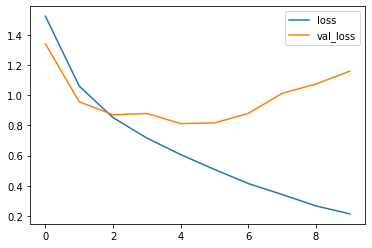

In [ ]:
plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.legend()
plt.show()

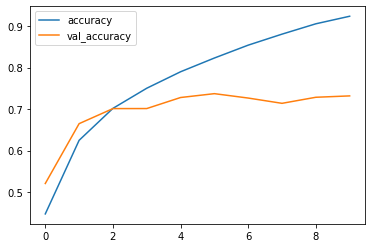

In [ ]:
plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history["val_accuracy"], label="val_accuracy")
plt.legend()
plt.show()

## Test model

In [ ]:
score = model.evaluate(x_test, y_test)
print(f'Loss: {score[0]}')
print(f'Accuracy: {score[1]}')

313/313 [==============================] - 2s 6ms/step - loss: 0.8284 - accuracy: 0.7309
Loss: 0.8283562660217285
Accuracy: 0.73089998960495


## Build model **again**

In [ ]:
model = models.Sequential()

# Input
model.add(keras.layers.Input(shape=(32, 32, 3)))

# Hidden CNN
model.add(keras.layers.Conv2D(32, kernel_size=(3,3), padding='same', activation='relu'))
model.add(keras.layers.Conv2D(64, kernel_size=(3,3), padding='same', activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.Conv2D(32, kernel_size=(3,3), padding='same', activation='relu'))
model.add(keras.layers.Conv2D(64, kernel_size=(3,3), padding='same', activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))

# Output
model.add(keras.layers.Dense(num_classes, activation='softmax'))

## Data Augmentation

[```tf.keras.preprocessing.image.ImageDataGenerator```](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator)

In [ ]:
aug_train = ImageDataGenerator(
    rotation_range=30,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest")

aug_val = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.15,
    shear_range=0.15,
    fill_mode="nearest")

In [ ]:
aug_train.fit(x_train)
aug_val.fit(x_val)

## Train *advanced* model

In [ ]:
epochs = 15

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics =['accuracy'])
  
# fitting the model 
history = model.fit(aug_train.flow(x_train, y_train, batch_size=32),
          validation_data=aug_val.flow(x_val, y_val, batch_size=8),
          steps_per_epoch=len(x_train) // 32,
          epochs=epochs,
          callbacks=[early_stopping])

Epoch 1/15
1250/1250 [==============================] - 54s 42ms/step - loss: 1.7263 - accuracy: 0.3625 - val_loss: 1.3475 - val_accuracy: 0.5098
Epoch 2/15
1250/1250 [==============================] - 51s 41ms/step - loss: 1.4063 - accuracy: 0.4917 - val_loss: 1.2230 - val_accuracy: 0.5585
Epoch 3/15
1250/1250 [==============================] - 51s 41ms/step - loss: 1.2927 - accuracy: 0.5363 - val_loss: 1.1005 - val_accuracy: 0.6068
Epoch 4/15
1250/1250 [==============================] - 50s 40ms/step - loss: 1.2003 - accuracy: 0.5718 - val_loss: 1.0187 - val_accuracy: 0.6393
Epoch 5/15
1250/1250 [==============================] - 50s 40ms/step - loss: 1.1469 - accuracy: 0.5893 - val_loss: 0.9967 - val_accuracy: 0.6442
Epoch 6/15
1250/1250 [==============================] - 51s 40ms/step - loss: 1.1009 - accuracy: 0.6082 - val_loss: 0.9474 - val_accuracy: 0.6623
Epoch 7/15
1250/1250 [==============================] - 50s 40ms/step - loss: 1.0618 - accuracy: 0.6214 - val_loss: 0.9115 -

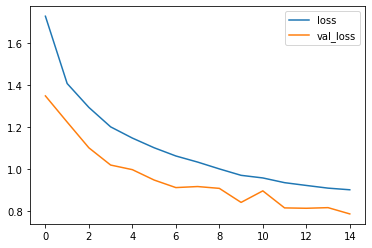

In [ ]:
plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.legend()
plt.show()

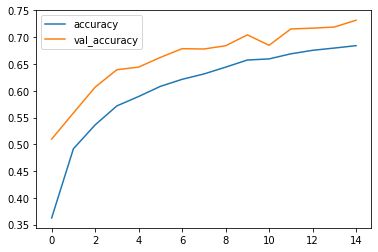

In [ ]:
plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history["val_accuracy"], label="val_accuracy")
plt.legend()
plt.show()

## Test model

In [ ]:
score = model.evaluate(x_test, y_test)
print(f'Loss: {score[0]}')
print(f'Accuracy: {score[1]}')

313/313 [==============================] - 2s 7ms/step - loss: 0.8687 - accuracy: 0.7123
Loss: 0.8686996102333069
Accuracy: 0.7123000025749207


## **Techniques Combination**

Data Augmentation, Early Stopping, **Weight Decay**, and **Dropout**

$$J_{reg}(\theta) = J(\theta) + \lambda R(\theta)$$

applied to **L2-regularization** (weight decay):

$$J_{reg}(\theta) = J(\theta) + \lambda ||w||^2_2$$

then in **backpropagation**:

$$\frac{\partial J_{reg}}{\partial w} = \frac{\partial J}{\partial w} + \lambda w$$

in **gradient descent**:

$$w \leftarrow w - \alpha \frac{\partial J_{reg}}{\partial w}$$
$$w \leftarrow w - \alpha (\frac{\partial J}{\partial w} + \lambda w)$$
$$w \leftarrow (1 - \alpha \lambda)w - \alpha \frac{\partial J}{\partial w}$$

In [ ]:
model = models.Sequential()

# Input
model.add(keras.layers.Input(shape=(32, 32, 3)))

# Hidden CNN
model.add(keras.layers.Conv2D(32, kernel_size=(3,3), padding='same', activation='relu'))
model.add(keras.layers.Conv2D(64, kernel_size=(3,3), padding='same', activation='relu', activity_regularizer=keras.regularizers.l2(l2=1e-4)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.Conv2D(32, kernel_size=(3,3), padding='same', activation='relu'))
model.add(keras.layers.Conv2D(64, kernel_size=(3,3), padding='same', activation='relu', activity_regularizer=keras.regularizers.l2(l2=1e-4)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(128, activation='relu'))

# Output
model.add(keras.layers.Dense(num_classes, activation='softmax'))

In [ ]:
epochs = 15

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics =['accuracy'])
  
# fitting the model 
model.fit(aug_train.flow(x_train, y_train, batch_size=32),
          validation_data=aug_val.flow(x_val, y_val, batch_size=8),
          steps_per_epoch=len(x_train) // 32,
          epochs=epochs,
          callbacks=[early_stopping])

Epoch 1/15
1250/1250 [==============================] - 52s 41ms/step - loss: 1.7387 - accuracy: 0.3594 - val_loss: 1.5239 - val_accuracy: 0.4625
Epoch 2/15
1250/1250 [==============================] - 51s 41ms/step - loss: 1.4182 - accuracy: 0.4864 - val_loss: 1.1998 - val_accuracy: 0.5733
Epoch 3/15
1250/1250 [==============================] - 51s 41ms/step - loss: 1.3010 - accuracy: 0.5323 - val_loss: 1.1251 - val_accuracy: 0.5919
Epoch 4/15
1250/1250 [==============================] - 52s 41ms/step - loss: 1.2179 - accuracy: 0.5653 - val_loss: 1.0124 - val_accuracy: 0.6443
Epoch 5/15
1250/1250 [==============================] - 51s 41ms/step - loss: 1.1685 - accuracy: 0.5820 - val_loss: 1.0313 - val_accuracy: 0.6392
Epoch 6/15
1250/1250 [==============================] - 51s 41ms/step - loss: 1.1269 - accuracy: 0.6025 - val_loss: 0.9854 - val_accuracy: 0.6571
Epoch 7/15
1250/1250 [==============================] - 52s 42ms/step - loss: 1.0927 - accuracy: 0.6140 - val_loss: 0.9523 -

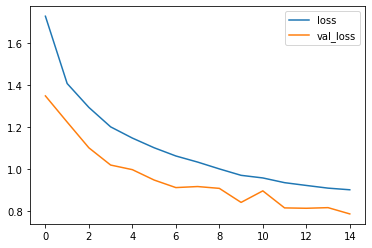

In [ ]:
plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.legend()
plt.show()

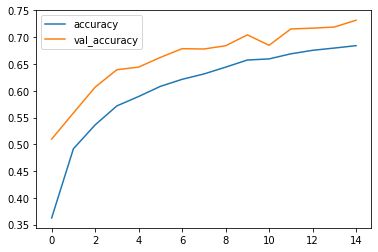

In [ ]:
plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history["val_accuracy"], label="val_accuracy")
plt.legend()
plt.show()

## Test model

In [ ]:
score = model.evaluate(x_test, y_test)
print(f'Loss: {score[0]}')
print(f'Accuracy: {score[1]}')

313/313 [==============================] - 3s 8ms/step - loss: 0.8823 - accuracy: 0.7049
Loss: 0.8823363184928894
Accuracy: 0.7049000263214111


# Transfer Learning

**ILSVRC (ImageNet Large Scale Visual Recognition Challenge)**: https://www.image-net.org/challenges/LSVRC/index.php
- Task 1: Detection.
- Task 2: Classification and localization.

- **LeNet**: Convolutional layers are stacked up one over the other.

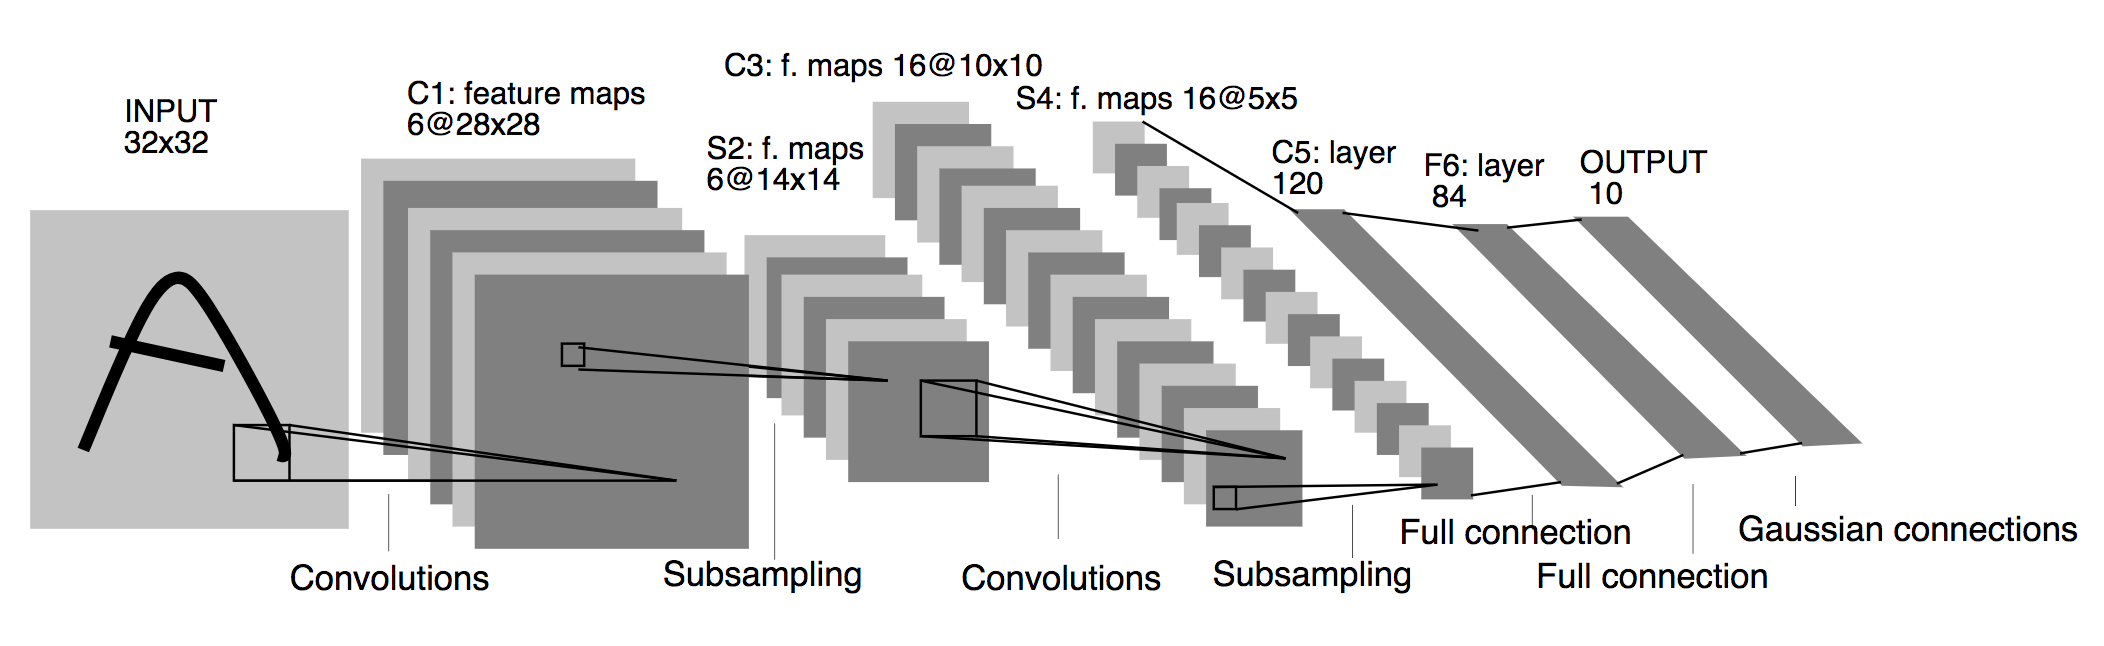

- **AlexNet** - Champion of **ILSVRC 2012**: `8 layers = 5 CNN (3x3, 5x5, 11x11 filters) + 3 FC`.

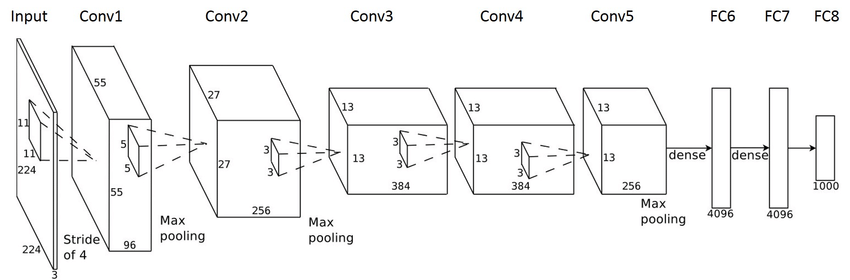

- **VGG16** - Champion of **ILSVRC 2014** - beats **GoogleNet** on **Localization**:
  - started focusing to *increase the depth* of the network.
  - only used `3×3` kernels in every convolution layer.
  - `16` stands for `16` Convolutional Layers.

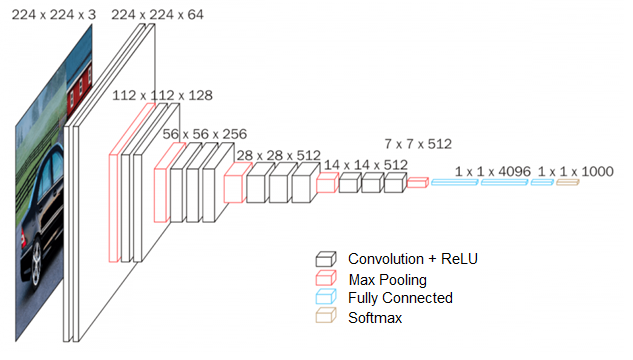

- **GoogleNet (Inception-V1)** - Champion of **ILSVRC 2014**:
  - used `1×1` *convolution* operation to control the size of the volume.
  - collection of *convolution* and *pooling* operation performed in a parallel manner so that features can be extracted using **different scales**.

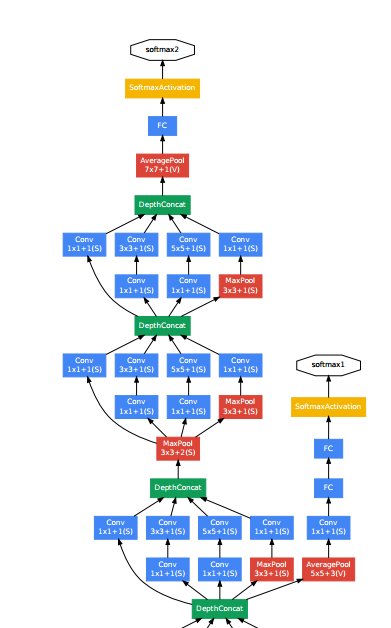

- **ResNet152** - Champion of **ILSVRC 2015**: make an **identity connection** between the layers.

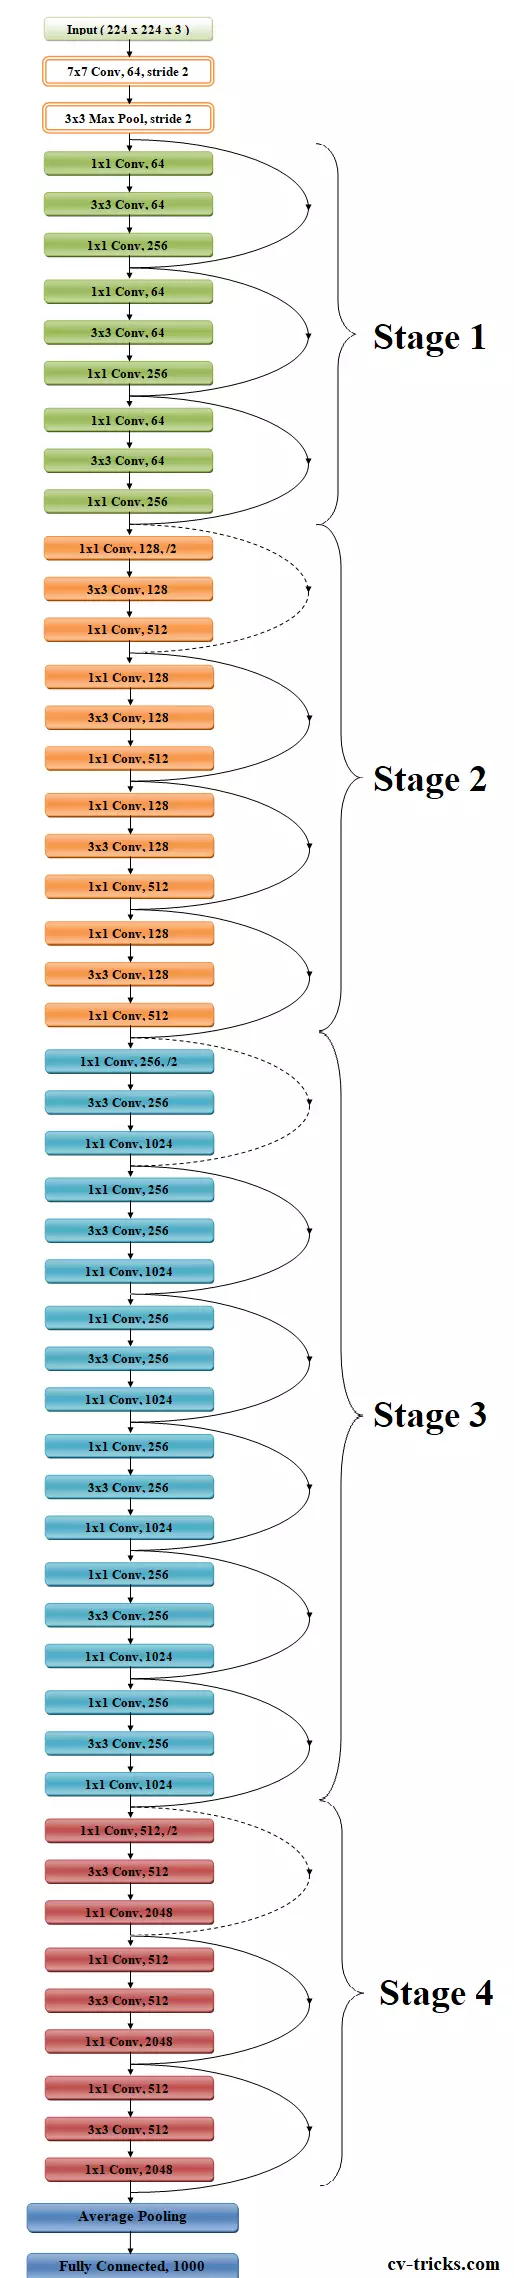

## Set up

In [ ]:
!nvidia-smi

Wed Dec 29 10:23:50 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.44       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   32C    P8    28W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from google.colab import drive
drive.mount("./drive")

Mounted at ./drive


In [ ]:
%cd drive/MyDrive

/content/drive/MyDrive


In [ ]:
import tensorflow
import tensorflow.keras as keras
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
import tensorflow as tf
from keras.utils import np_utils
from keras.models import load_model
from keras.datasets import cifar10
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## Prepare data

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train / 255.0
x_test = x_test / 255.0

y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

print(x_train.shape)
print(x_test.shape)

170508288/170498071 [==============================] - 2s 0us/step
(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [ ]:
print(y_train)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [ ]:
from sklearn.model_selection import train_test_split

x_for_train, x_for_validation, y_for_train, y_for_validation = train_test_split(x_train, y_train, test_size=0.33, random_state=2021)

## Build model

Referecne: https://cv-tricks.com/keras/understand-implement-resnets/

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50

rn50 = ResNet50(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

94781440/94765736 [==============================] - 1s 0us/step


To begin with, the input image of CIFAR-10 is `32x32` so it needs to be upscaled `3` times before we can pass it through the pre-trained model. After the images go through the pre-trained model, we flatten our processed input and pass it though 2 dense layers (with `128` and `64` neurons respectively). Each layer has batch normalization beforehand and dropout coming out before the last layer, with softmax and `10` neurons.

In [ ]:
model = models.Sequential()
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(rn50)
model.add(layers.Flatten())
model.add(layers.Dense(128))
model.add(layers.BatchNormalization())
model.add(layers.ReLU())
model.add(layers.Dense(64))
model.add(layers.BatchNormalization())
model.add(layers.ReLU())
model.add(layers.Dense(10, activation='softmax'))

## Train model

Fine-tuning

In [ ]:
for layer in rn50.layers:
  if isinstance(layer, layers.BatchNormalization):
    layer.trainable = True
  else:
    layer.trainable = False

In [ ]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics =['accuracy'])

In [ ]:
history = model.fit(x_for_train, y_for_train, epochs=5, batch_size=64, validation_data=(x_for_validation, y_for_validation))

Epoch 1/5
524/524 [==============================] - 741s 1s/step - loss: 1.0331 - accuracy: 0.6738 - val_loss: 2.6880 - val_accuracy: 0.1041
Epoch 2/5
524/524 [==============================] - 730s 1s/step - loss: 0.4221 - accuracy: 0.8775 - val_loss: 0.4819 - val_accuracy: 0.8413
Epoch 3/5
524/524 [==============================] - 733s 1s/step - loss: 0.2440 - accuracy: 0.9289 - val_loss: 0.2883 - val_accuracy: 0.9126
Epoch 4/5
524/524 [==============================] - 732s 1s/step - loss: 0.1591 - accuracy: 0.9542 - val_loss: 0.3082 - val_accuracy: 0.9128
Epoch 5/5
524/524 [==============================] - 732s 1s/step - loss: 0.1122 - accuracy: 0.9676 - val_loss: 0.3165 - val_accuracy: 0.9204


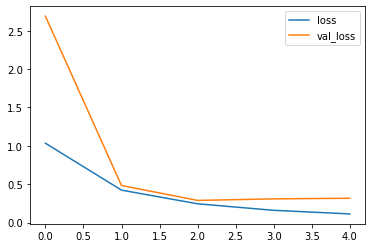

In [ ]:
plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.legend()
plt.show()

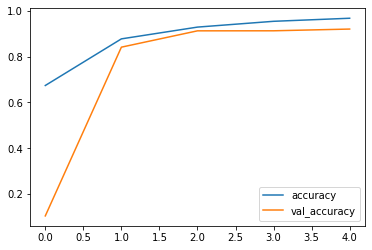

In [ ]:
plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history["val_accuracy"], label="val_accuracy")
plt.legend()
plt.show()

In [ ]:
model.save("./Save_model/model.h5")

/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


## Test model

In [ ]:
from google.colab import drive
drive.mount("./drive")

Mounted at ./drive


In [ ]:
%cd drive/MyDrive

/content/drive/MyDrive


In [ ]:
model = tf.keras.models.load_model("./Save_model/model.h5")

In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 77s 242ms/step - loss: 0.3197 - accuracy: 0.9160


[0.31972870230674744, 0.9160000085830688]

## Test model (customized)

In [ ]:
dictionary = {0: "airplane",
              1: "automobile",
              2: "bird",
              3: "cat",
              4: "deer",
              5: "dog",
              6: "frog",
              7: "horse",
              8: "ship",
              9: "truck"}

In [ ]:
import sys

image_list = []

for i in range(1,20001):
  image = Image.open(f"./test/{i}.png")
  sys.stdout.write("\r" + f"Having loaded: {i} image(s).")
  sys.stdout.flush()
  image_list.append(image)

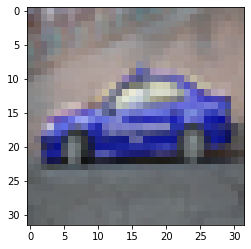

In [ ]:
plt.imshow(image_list[0])
plt.show()

In [ ]:
image_array = [np.asarray(image) for image in image_list]

In [ ]:
image_array = np.asarray(image_array)

In [ ]:
image_array = image_array / 255.0

In [ ]:
image_array[0]

array([[[0.4627451 , 0.45882353, 0.51764706],
        [0.42745098, 0.4       , 0.43529412],
        [0.58039216, 0.57254902, 0.59215686],
        ...,
        [0.52156863, 0.47843137, 0.45882353],
        [0.52941176, 0.48235294, 0.4627451 ],
        [0.51372549, 0.46666667, 0.44313725]],

       [[0.38431373, 0.31764706, 0.3372549 ],
        [0.43921569, 0.38039216, 0.40392157],
        [0.54117647, 0.53333333, 0.55294118],
        ...,
        [0.52156863, 0.4627451 , 0.43921569],
        [0.54901961, 0.49019608, 0.46666667],
        [0.5254902 , 0.47843137, 0.45490196]],

       [[0.38431373, 0.29411765, 0.25882353],
        [0.43137255, 0.36470588, 0.34901961],
        [0.49803922, 0.4745098 , 0.50588235],
        ...,
        [0.59607843, 0.5254902 , 0.49803922],
        [0.58039216, 0.51372549, 0.49019608],
        [0.55686275, 0.49803922, 0.48235294]],

       ...,

       [[0.3372549 , 0.35686275, 0.36862745],
        [0.36470588, 0.38823529, 0.39607843],
        [0.37647059, 0

In [ ]:
predictions = model.predict(image_array)

In [ ]:
predictions[0]

array([2.1775840e-08, 9.9999893e-01, 3.5092459e-10, 4.5230211e-09,
       5.6681393e-10, 1.1772660e-09, 5.8541847e-09, 4.9895021e-09,
       7.3553274e-08, 9.5629264e-07], dtype=float32)

In [ ]:
import csv

header = ["id", "label"]

with open("./Save_model/outputs.csv", "w", encoding="UTF8", newline="") as f:
  writer = csv.writer(f)

  writer.writerow(header)

  for i in range(0, 20000):
    writer.writerow([ f"{i+1}", dictionary[np.argmax(predictions[i])] ])